In [1]:
%conda install -c conda-forge tensorflow
import tensorflow as tf 

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Custom Layer
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self,units=32):
        super(MyDenseLayer,self).__init__()
        self.units=units #number of neurons
    def build(self,input_shape):
        self.weight=self.add_weight(shape=(input_shape[-1],self.units), #input_shape[-1] is the number of neurons in the previous layer
                                    initializer='random_normal',
                                    trainable=True)
        self.bias=self.add_weight(shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)
    def call(self,inputs):
        return tf.nn.relu(tf.matmul(inputs,self.weight)+self.bias)

In [22]:
# Create a model using the custom layer with a dropout layer


model=tf.keras.Sequential([
    MyDenseLayer(128),
    tf.keras.layers.Dropout(0.5),
    MyDenseLayer(10),
    tf.keras.layers.Softmax()
])

The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy())
print("Model summary before building")
model.summary()

model.build((1000,20))
print("Model summary after building")
model.summary()

Model summary before building


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_dense_layer_3 (MyDenseLayer) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_dense_layer_4 (MyDenseLayer) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model summary after building


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_dense_layer_3 (MyDenseLayer) │ (1000, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1000, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_dense_layer_4 (MyDenseLayer) │ (1000, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

####	dense layer:
•	Input shape: (1000, 20) → Output shape: (1000, 128)
•	Weights: (20, 128) → Total parameters:  20 x 64 + 64 = 2,688 
####	dense_1 layer:
•	Input shape: (1000, 128) → Output shape: (1000, 10)
•	Weights: (128, 10) → Total parameters:  128 x 10 + 10 = 1290

In [24]:
# Train the model
import numpy as np

x_train=np.random.random((1000,20))
y_train=np.random.randint(10, size=(1000,1))

# Convert the labels to categorical
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
model.fit(x_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 2.3042 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 2.2998
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 2.2984
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 2.2986
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 2.2982
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 2.2944
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 2.2982
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 2.2874
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 2.2938
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 2.2932


In [25]:
# Evaluate the model
x_test=np.random.random((200,20))
y_test=np.random.randint(10, size=(200,1))
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

loss =model.evaluate(x_test,y_test)
print("Loss: ",loss)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 2.3009
Loss:  2.3005242347717285


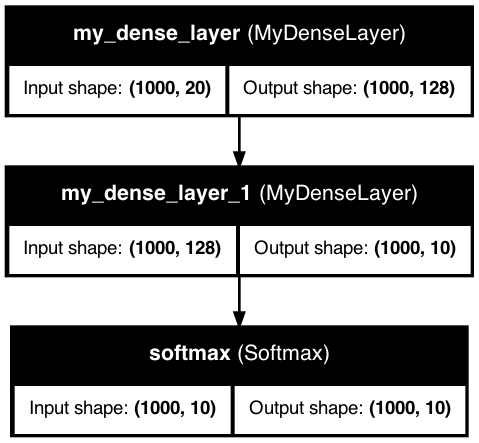

In [19]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)   